Contents
1. Importing Libraries and Dataset
2. Data Visualization
3. Label Encoding
4. Scalling
5. Prediction Models
6. Spliting the dataset into 75:25 ratio
7. Comparing the accuracy of the models

#Goal

The goal of this project is to make a Prediction model which will predict the prices of the laptops depending on various factors, such as size, company, set up and many more things!

Importing all the required libraries and dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('/content/laptops.csv',encoding='latin-1')

In [3]:
df.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [6]:
df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlations = df_numeric.corr()
print(correlations)


             Unnamed: 0    Inches  Price_euros
Unnamed: 0     1.000000 -0.087796     0.067830
Inches        -0.087796  1.000000     0.068197
Price_euros    0.067830  0.068197     1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
data_num = df.select_dtypes(include = ["int64", "float64"])
data_num.columns.tolist()

['Unnamed: 0', 'Inches', 'Price_euros']

#Data Visualization

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.

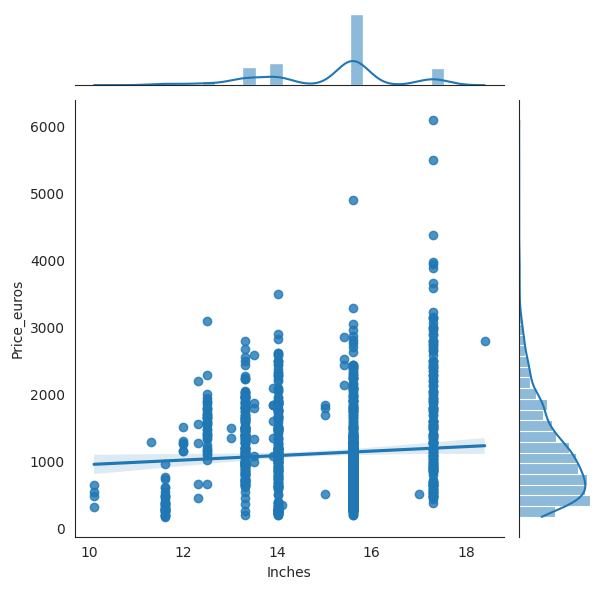

In [8]:
import seaborn as sns
with sns.axes_style("white"):
    sns.jointplot(x='Inches', y='Price_euros', data= data_num, kind = "reg")


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

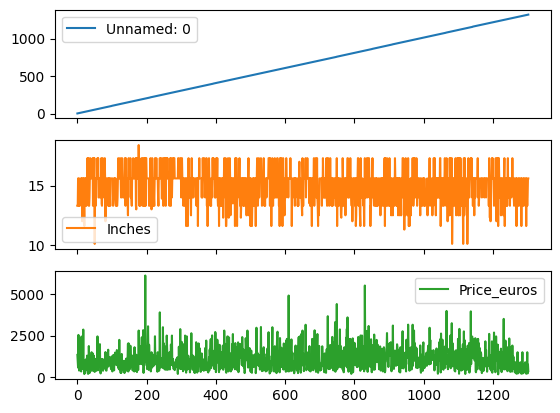

In [9]:
import matplotlib.pyplot as plt
data_num.plot(subplots=True)

<Axes: xlabel='Inches', ylabel='Probability'>

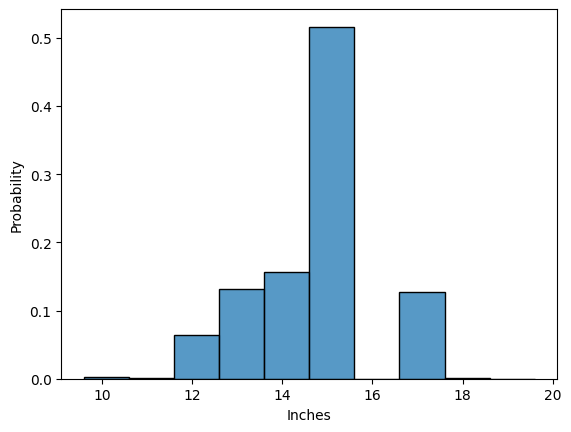

In [10]:
sns.histplot(data=data_num, x="Inches", stat="probability", discrete=True)

<Axes: xlabel='Price_euros', ylabel='Count'>

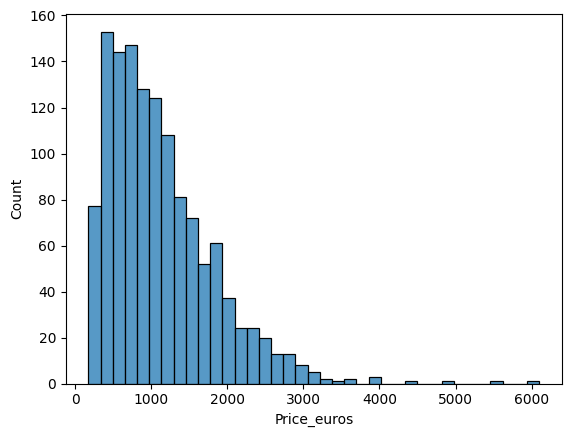

In [11]:
sns.histplot(data = df, x= "Price_euros")

<Axes: xlabel='Price_euros', ylabel='Count'>

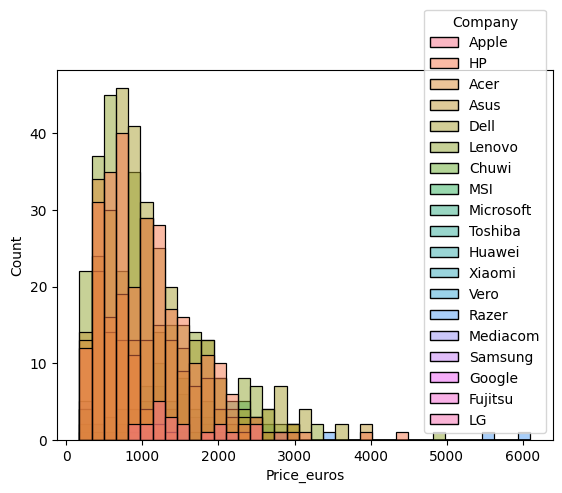

In [12]:
sns.histplot(x = "Price_euros", data = df, hue = "Company")

<Axes: xlabel='Price_euros', ylabel='Density'>

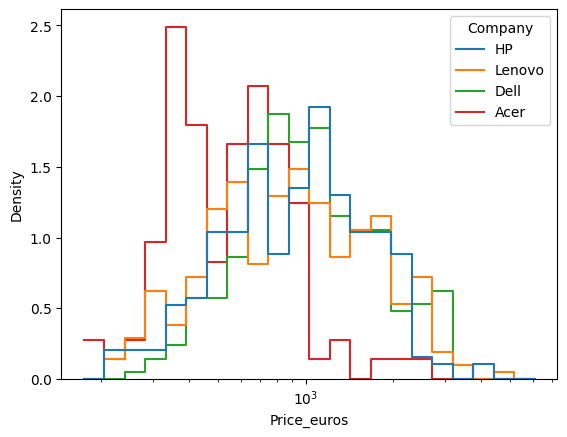

In [13]:
sns.histplot(data = df, x= "Price_euros",hue = "Company", hue_order = [ "HP","Lenovo", 'Dell',"Acer"],
            log_scale = True, element ="step", fill = False, stat = "density", common_norm = False)

In [14]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [15]:
df['Inches'].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

In [16]:
df.drop(columns=['Unnamed: 0','Company','Inches','ScreenResolution','TypeName','Weight'],inplace=True)
df.head()

# these feature are unique and does nothing in our predictions, So, we drop it !!

,Product,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,MacBook Pro,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69
1,Macbook Air,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94
2,250 G6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,575.00
3,MacBook Pro,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,2537.45
4,MacBook Pro,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60


In [17]:
df.reset_index(drop=True,inplace=True)

#Label Encoding

Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      1303 non-null   object 
 1   Cpu          1303 non-null   object 
 2   Ram          1303 non-null   object 
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Price_euros  1303 non-null   float64
dtypes: float64(1), object(6)
memory usage: 71.4+ KB


In [19]:
col = [feature for feature in df.columns if df[feature].dtype == 'O']

# Using List comprehension for extracting categorical column names

Encoding
Working of below code

We are going to assign each and every value of a categorical feature to a no.
This assignment of no.s will be done by how much it worths as target feature
we are going to group dataset by feature.
Then, we will take out mean of target feature('Price_euros') of the grouped data.
Now, Sort the values and get the index.
Now, make a dictionary, and assign index, to value 0 to n.
So, Now we can actually get changes to our original dataset

In [20]:
for feature in col:
    labels_ordered= df.groupby([feature])['Price_euros'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [21]:
df.head()

,Product,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,559,85,3,13,80,8,1339.69
1,333,64,3,14,45,8,898.94
2,107,58,3,20,54,2,575.00
3,559,111,5,30,95,8,2537.45
4,559,99,3,20,84,8,1803.60


In [22]:
y = df['Price_euros']
X = df.drop(columns='Price_euros')

#Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # setting with_mean False, is for a reason !

temp = scaler.fit_transform(X)
X = pd.DataFrame(temp)

Training and Testing Dataset Spliting using the train_test_split

Immporting the library from the sklearn.model_selection
Split the dataset into 75:25 ratio
x_train and y_train are the trainning datasets
x_test and y_test are the testing datasets
After the spliting of the datasets the model is ready to be prepared!

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle = True)


In [25]:
from sklearn import metrics

#Prediction Model Creation
Predictive modeling, also called predictive analytics, is a mathematical process that seeks to predict future events or outcomes by analyzing patterns that are likely to forecast future results.

Now to build that prediction model I amgoing to use regression algorithms. Now let's find out what is regression algorithms?

Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.

Here we are going to prepare several Regression machine learning models based on those we will do a comparative analysis that which model is better among them.

Simple Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
lr.score(X_train,y_train) # train-set score

0.8357155294189313

In [29]:
lr.score(X_test,y_test) # test-set score

0.7847431032252344

In [30]:
y_pred = lr.predict(X_test) # prediction

In [31]:
#Calculate RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R2 score
r2_score = metrics.r2_score(y_test, y_pred)
print(f'R2-Score: {r2_score}')

Root Mean Squared Error (RMSE): 338.3508436375497
R2-Score: 0.7847431032252344


Lasso Regression

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [49]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [50]:
y_pred = lasso.predict(X_test)

In [51]:
#Calculate RMSE
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse_lr}')

# Calculate R2 score
r2_score_lr = metrics.r2_score(y_test, y_pred)
print(f'R2-Score: {r2_score_lr}')

Root Mean Squared Error (RMSE): 338.3630563672804
R2-Score: 0.7847275636053584


Random Forest Regression

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=1)

In [33]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [34]:
rfr.score(X_train,y_train) # train-set score

0.9852196558985368

In [35]:
rfr.score(X_test,y_test) # test-set score

0.9333575624283379

In [36]:
y_pred = rfr.predict(X_test) #prediction

In [39]:
#Calculate RMSE
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')

# Calculate R2 score
r2_score_rf = metrics.r2_score(y_test, y_pred)
print(f'R2-Score: {r2_score_rf}')

Root Mean Squared Error (RMSE): 188.26264805764146
R2-Score: 0.9333575624283379


Decision Tree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.

In [40]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
y_pred = dtr.predict(X_test)

In [42]:
#Calculate RMSE
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse_dt}')

# Calculate R2 score
r2_score_dt = metrics.r2_score(y_test, y_pred)
print(f'R2-Score: {r2_score_dt}')

Root Mean Squared Error (RMSE): 254.07529354589192
R2-Score: 0.8786199199162766


XgBoost Regressor

XGBoost is a powerful approach for building supervised regression models. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.

In [43]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred = xgb.predict(X_test)

In [45]:
#Calculate RMSE
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse_xgb}')

# Calculate R2 score
r2_score_xgb = metrics.r2_score(y_test, y_pred)
print(f'R2-Score: {r2_score_xgb}')

Root Mean Squared Error (RMSE): 212.18732415186915
R2-Score: 0.9153432835278198


Gradient Boosting Regressor

Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [47]:
y_pred = gb.predict(X_test)

In [48]:
#Calculate RMSE
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse_gb}')

# Calculate R2 score
r2_score_gb = metrics.r2_score(y_test, y_pred)
print(f'R2-Score: {r2_score_gb}')

Root Mean Squared Error (RMSE): 187.10300288022864
R2-Score: 0.9341760313672284
